<a href="https://colab.research.google.com/github/luizfreire96/Car-industry-70-82/blob/main/Car%20Industry%20Exploratory%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHALLENGE 0

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

In [60]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Make an initial reading of the data and explore its information, study its shape and present an initial analysis of the dispersion measures of its attributes.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/auto_industry.csv')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
321,32.2,4,108.0,75.0,2265,15.2,80,japan,toyota corolla
179,22.0,4,121.0,98.0,2945,14.5,75,europe,volvo 244dl
316,19.1,6,225.0,90.0,3381,18.7,80,usa,dodge aspen
258,20.6,6,231.0,105.0,3380,15.8,78,usa,buick century special
328,30.0,4,146.0,67.0,3250,21.8,80,europe,mercedes-benz 240d
43,13.0,8,400.0,170.0,4746,12.0,71,usa,ford country squire (sw)
41,14.0,8,318.0,150.0,4096,13.0,71,usa,plymouth fury iii
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m
118,24.0,4,116.0,75.0,2158,15.5,73,europe,opel manta


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Look for missing values ​​in dataframe columns and make the most reasonable replacements.

In [4]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
nalist = df[df['horsepower'].isna()]['name']

In [6]:
dfna = df[df['name'].isin(nalist)].sort_values('name')
dfna

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
100,18.0,6,250.0,88.0,3021,16.5,73,usa,ford maverick
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
112,19.0,4,122.0,85.0,2310,18.5,73,usa,ford pinto
130,26.0,4,122.0,80.0,2451,16.5,74,usa,ford pinto


In [7]:
df[df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [8]:
X = df[df['horsepower'].notna()][['cylinders', 'displacement']]
y = df[df['horsepower'].notna()]['horsepower']
LR = LinearRegression().fit(X, y)

naidx = df.index.values[df['horsepower'].isna()]
X_substitute = df[['cylinders', 'displacement']].iloc[naidx]
df['horsepower'].iloc[naidx] = LR.predict(X_substitute)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
df.iloc[naidx]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,72.596396,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,105.259770,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,67.824893,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,88.012022,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,73.330473,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,92.049448,3035,20.5,82,usa,amc concord dl


In [11]:
df[df['name'].isin(nalist)].sort_values('name')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
374,23.0,4,151.0,92.049448,3035,20.5,82,usa,amc concord dl
17,21.0,6,200.0,85.000000,2587,16.0,70,usa,ford maverick
100,18.0,6,250.0,88.000000,3021,16.5,73,usa,ford maverick
126,21.0,6,200.0,105.259770,2875,17.0,74,usa,ford maverick
155,15.0,6,250.0,72.000000,3158,19.5,75,usa,ford maverick
193,24.0,6,200.0,81.000000,3012,17.6,76,usa,ford maverick
336,23.6,4,140.0,88.012022,2905,14.3,80,usa,ford mustang cobra
32,25.0,4,98.0,72.596396,2046,19.0,71,usa,ford pinto
112,19.0,4,122.0,85.000000,2310,18.5,73,usa,ford pinto
130,26.0,4,122.0,80.000000,2451,16.5,74,usa,ford pinto


## Calculate how many models were released in even years

In [12]:
df['name'][df['model_year'] % 2 == 0].count()

214

## Create a column for the vehicle make and another for the name



In [13]:
df['brand'] = [i[0] for i in df['name'].str.split(' ')]
df['model'] = [' '.join(i[1:]) for i in df['name'].str.split(' ')]

In [14]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,model
98,16.0,6,250.0,100.0,3278,18.0,73,usa,chevrolet nova custom,chevrolet,nova custom
76,18.0,4,121.0,112.0,2933,14.5,72,europe,volvo 145e (sw),volvo,145e (sw)
287,16.5,8,351.0,138.0,3955,13.2,79,usa,mercury grand marquis,mercury,grand marquis
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe,mazda,rx2 coupe
220,33.5,4,85.0,70.0,1945,16.8,77,japan,datsun f-10 hatchback,datsun,f-10 hatchback
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340,plymouth,'cuda 340
139,14.0,8,302.0,140.0,4638,16.0,74,usa,ford gran torino (sw),ford,gran torino (sw)
362,24.2,6,146.0,120.0,2930,13.8,81,japan,datsun 810 maxima,datsun,810 maxima
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
59,23.0,4,97.0,54.0,2254,23.5,72,europe,volkswagen type 3,volkswagen,type 3


## Is it possible to identify any relationship between mpg and acceleration?

In [15]:
fig = px.scatter(df, x='mpg', y='acceleration')
fig.show()

In [16]:
df[['mpg', 'acceleration']].corr()

,mpg,acceleration
mpg,1.000000,0.420289
acceleration,0.420289,1.000000


In [17]:
df['sqrmpg'] = df['mpg']**0.5

In [18]:
fig = px.scatter(df, x='sqrmpg', y='acceleration')
fig.show()

In [19]:
df[['sqrmpg', 'acceleration']].corr()

,sqrmpg,acceleration
sqrmpg,1.000000,0.434465
acceleration,0.434465,1.000000


In [20]:
df = df.drop(columns=['sqrmpg'])

We can observe a weak correlation, but it is significant.

## Explore the table variables by grouping by country of origin. Are there differences between them?

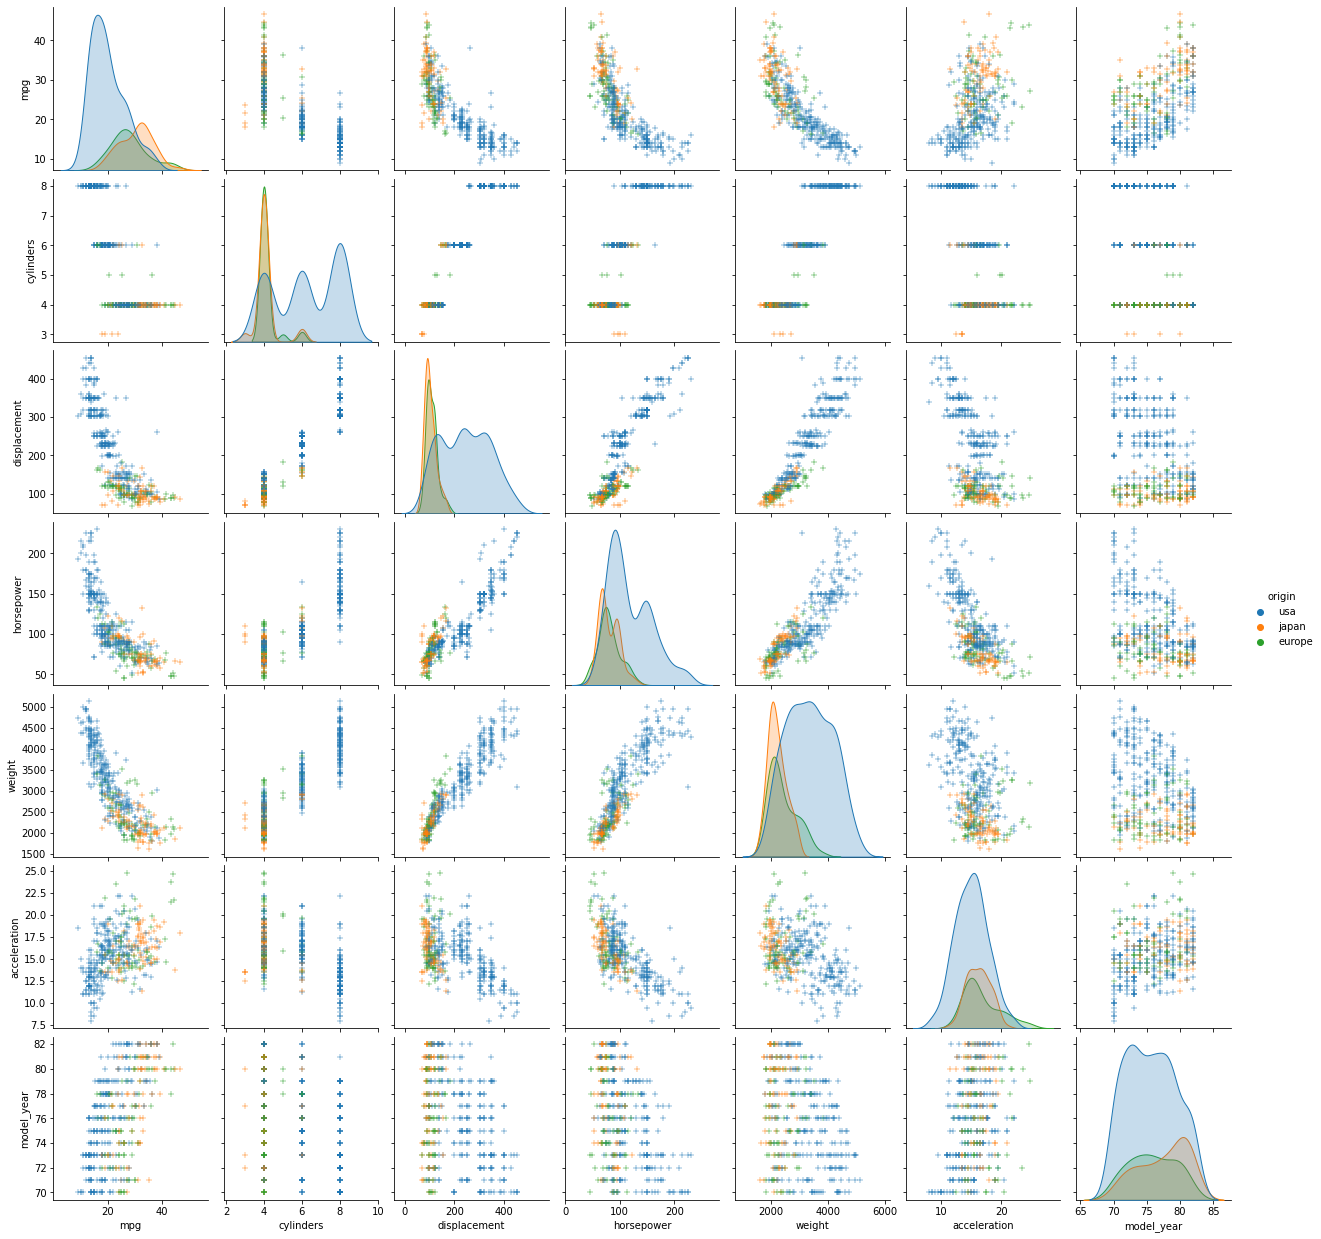

In [21]:
sns.pairplot(df, hue='origin', markers="+")

## Remove the duplicate elements and create a consumption table in (Km/L), change the names of the countries of origin so that they all start with capital letters.

In [22]:
df.duplicated().sum()

0

In [23]:
df['name'].duplicated().sum()

93

In [24]:
df0 = df.groupby('name').count()
df0 = df0.query('mpg > 1')

In [25]:
dup_names = df0.index.values.tolist()


In [26]:
dup_df = df[df['name'].isin(dup_names)]

In [27]:
dup_df = dup_df.sort_values('name')

In [28]:
dup_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,model
315,24.3,4,151.0,90.0,3003,20.1,80,usa,amc concord,amc,concord
257,19.4,6,232.0,90.0,3210,17.2,78,usa,amc concord,amc,concord
107,18.0,6,232.0,100.0,2789,15.0,73,usa,amc gremlin,amc,gremlin
169,20.0,6,232.0,100.0,2914,16.0,75,usa,amc gremlin,amc,gremlin
33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin,amc,gremlin
...,...,...,...,...,...,...,...,...,...,...,...
240,30.5,4,97.0,78.0,2190,14.1,77,europe,volkswagen dasher,volkswagen,dasher
203,29.5,4,97.0,71.0,1825,12.2,76,europe,volkswagen rabbit,volkswagen,rabbit
175,29.0,4,90.0,70.0,1937,14.0,75,europe,volkswagen rabbit,volkswagen,rabbit
197,29.0,4,90.0,70.0,1937,14.2,76,europe,vw rabbit,vw,rabbit


duplicate names will not be removed because in addition to representing a large portion of the data, they are the same names released in different years

In [29]:
dfkm = df.copy()
dfkm['mpg'] = dfkm['mpg']*0.4251
dfkm['origin'] = dfkm['origin'].str.capitalize()
dfkm.rename(columns={'mpg': 'km/L'}, inplace=True)
dfkm.head()

,km/L,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,model
0,7.6518,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,6.3765,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320
2,7.6518,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite
3,6.8016,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst
4,7.2267,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino


## Use the function [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to create a pivot table that calculates the average consumption (miles/galon ) `'mpg'`. Divide the dataframe into model year `'model_year'` and number of cylinders `'cylinders'`. Describe the results.



In [41]:
pivotdfmpgy = pd.pivot_table(df, index='model_year', values='mpg', aggfunc='mean')

In [42]:
px.line(pivotdfmpgy, x=pivotdfmpgy.index.values, y='mpg')

Despite the drop of the efficience in some years, we can see a growth trending of the efficiency over time

## Group the dataframe by origin `'origin'` and number of cylinders `'cylinders'` and calculate the average `'horsepower'` of the cars built.

In [47]:
df[['horsepower', 'origin', 'cylinders']].groupby(by=(['origin', 'cylinders']), ).agg('mean')

horsepower
origin cylinders            
europe 4           78.065958
       5           82.333333
       6          113.500000
japan  3           99.250000
       4           75.579710
       6          115.833333
usa    4           81.092470
       6           99.746754
       8          158.300971

## Check how consumption, power and cylinders changes in the years column for each country of origin.

In [84]:
dfviz = df[['horsepower', 'origin', 'cylinders', 'mpg', 'model_year']].groupby(by=(['model_year', 'origin']), ).agg('mean')
dfviz.reset_index(inplace=True)
px.line(dfviz, x='model_year', y='mpg', color='origin')

In [85]:
dfviz = df[['horsepower', 'origin', 'cylinders', 'mpg', 'model_year']].groupby(by=(['model_year', 'origin']), ).agg('mean')
dfviz.reset_index(inplace=True)
px.line(dfviz, x='model_year', y='cylinders', color='origin')

In [86]:
dfviz = df[['horsepower', 'origin', 'cylinders', 'mpg', 'model_year']].groupby(by=(['model_year', 'origin']), ).agg('mean')
dfviz.reset_index(inplace=True)
px.line(dfviz, x='model_year', y='horsepower', color='origin')

## Create a new column with the continent of countries based on the `origin` column

In [94]:
continents = []
for i in df['origin']:
  if i == 'usa':
    continents.append('North America')
  elif i == 'japan':
    continents.append('Asia')
  else:
    continents.append(i)
df['Continents'] = continents

In [95]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,model,Continents
24,21.0,6,199.0,90.0,2648,15.0,70,usa,amc gremlin,amc,gremlin,North America
64,15.0,8,318.0,150.0,4135,13.5,72,usa,plymouth fury iii,plymouth,fury iii,North America
286,17.6,8,302.0,129.0,3725,13.4,79,usa,ford ltd landau,ford,ltd landau,North America
62,13.0,8,350.0,165.0,4274,12.0,72,usa,chevrolet impala,chevrolet,impala,North America
338,27.2,4,135.0,84.0,2490,15.7,81,usa,plymouth reliant,plymouth,reliant,North America


# Bônus - estatística

# Apresente a centralidade, dispersão e distribuição das variáveis

In [96]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.148425,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.321413,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.024724,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Gere matriz e gráfico de correlação

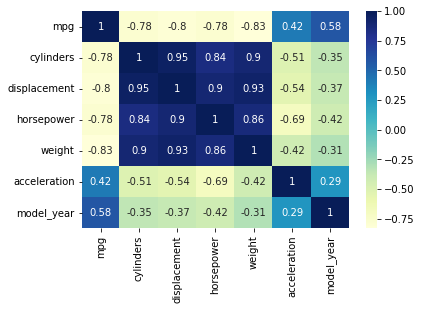

In [101]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Create a new column with the weight/power ratio for each vehicle and plot a scatter plot of that column with the consumption

In [103]:
df['massperpower'] = df['weight']/df['horsepower']

In [105]:
px.scatter(df, x='mpg', y='massperpower')

In [106]:
df[['massperpower', 'mpg']].corr()

,massperpower,mpg
massperpower,1.000000,0.237697
mpg,0.237697,1.000000
